In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context('notebook')

%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx

In [3]:
from crawler import BFS_crawl, draw_graph

In [4]:
import mpld3
mpld3.enable_notebook()

In [5]:
G = BFS_crawl(["https://medium.com/"], 2, 2, save=False)

BFS started with params: 
Depth_limit: 2
Breadth_limit: 2.
Estimated time: 8s
.......Crawling finished after 8.48697566986084s


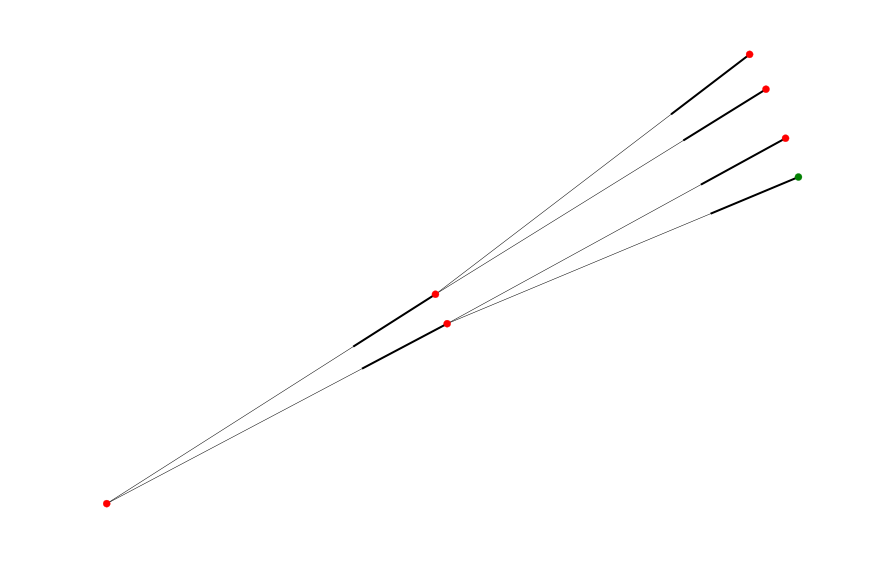

In [6]:
draw_graph(G, plt)

Amazon does not let us crawl without the API

In [7]:
import requests
r = requests.get("https://www.amazon.com/")
print(r.text[:200])

<!DOCTYPE html>
<!--[if lt IE 7]> <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8 a-lt-ie7"> <![endif]-->
<!--[if IE 7]>    <html lang="en-us" class="a-no-js a-lt-ie9 a-lt-ie8"> <![endif]-->
<!--[


In [8]:
import os
from crawler import Node, draw_graph

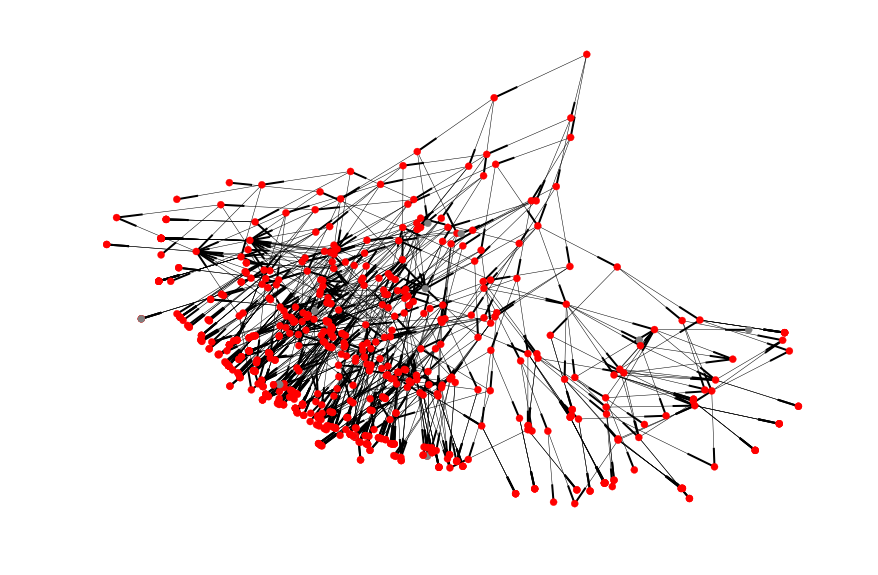

In [9]:
G_ebay = nx.read_gpickle(os.path.join("saved", "graphs", "https:,,www.ebay.com,-depth:6-breadth:3.pkl"))
draw_graph(G_ebay, plt)

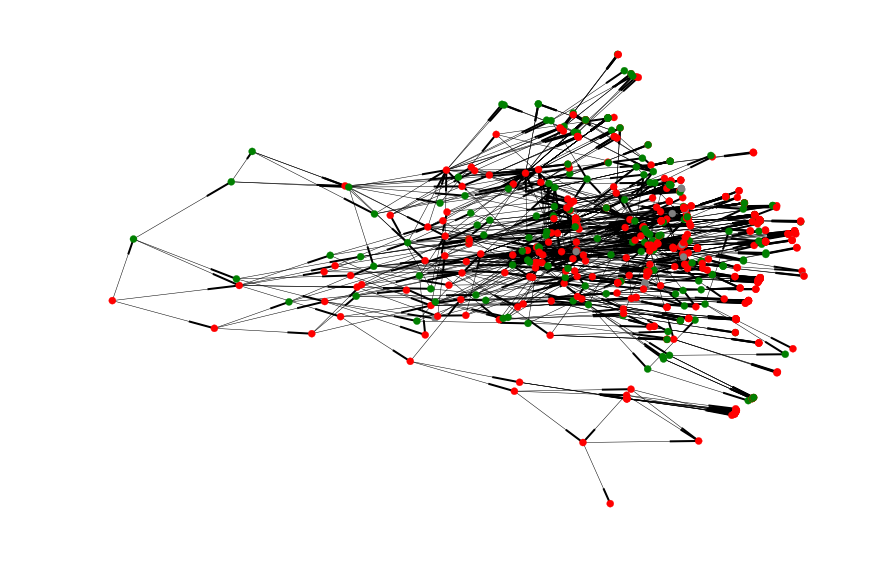

In [10]:
G_harvard = nx.read_gpickle(os.path.join("saved", "graphs", "http:,,online-learning.harvard.edu-depth:6-breadth:3.pkl"))
draw_graph(G_harvard, plt)

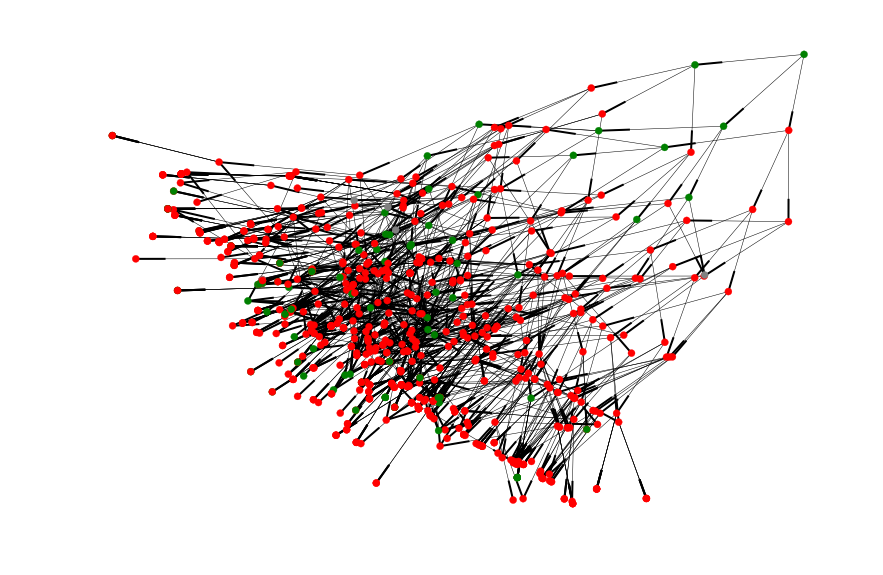

In [11]:
G_tutsplus = nx.read_gpickle(os.path.join("saved", "graphs", "https:,,tutsplus.com,-depth:6-breadth:3.pkl"))
draw_graph(G_tutsplus, plt)

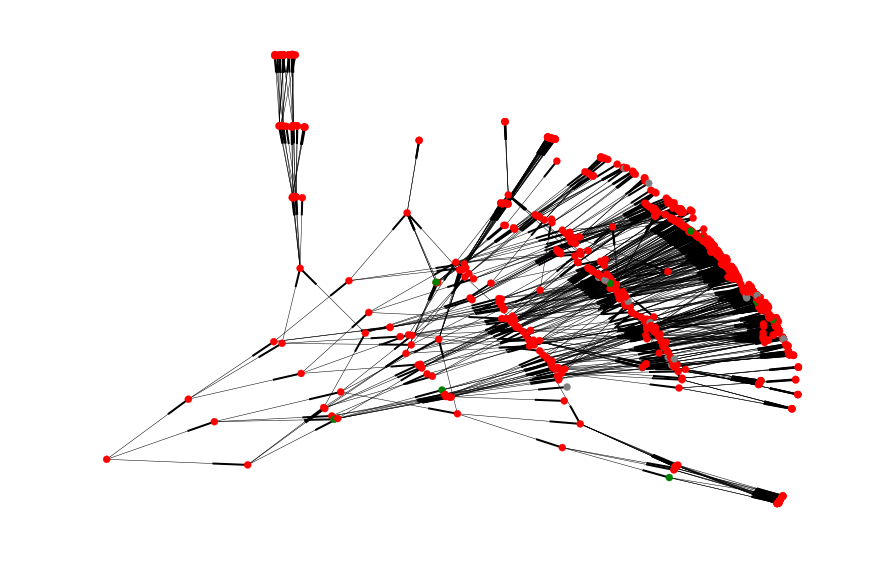

In [12]:
G_medium = nx.read_gpickle(os.path.join("saved", "graphs", "https:,,medium.com,-depth:6-breadth:3.pkl"))
draw_graph(G_medium, plt)

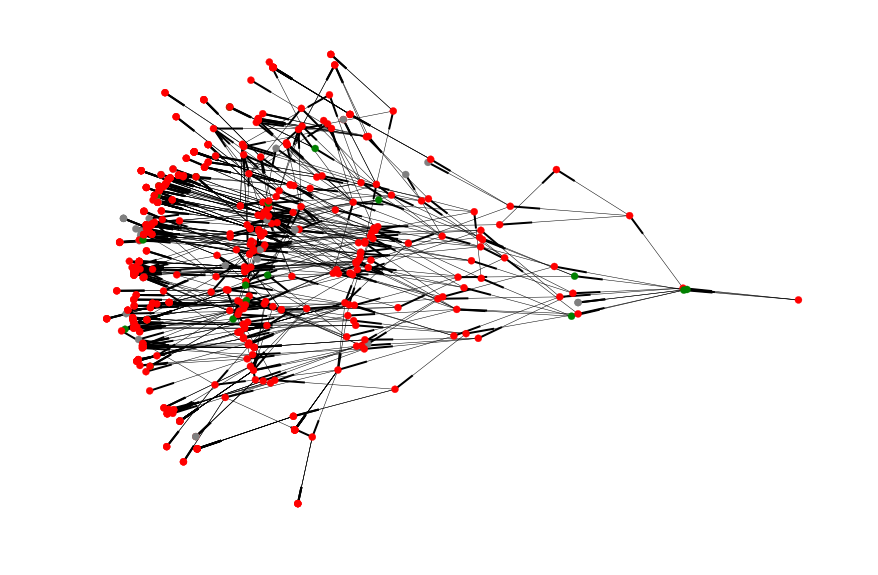

In [13]:
G_google_psy = nx.read_gpickle(os.path.join("saved", "graphs", "https:,,www.google.ch,search?q=course+about+psychology-depth:6-breadth:3.pkl"))
draw_graph(G_google_psy, plt)

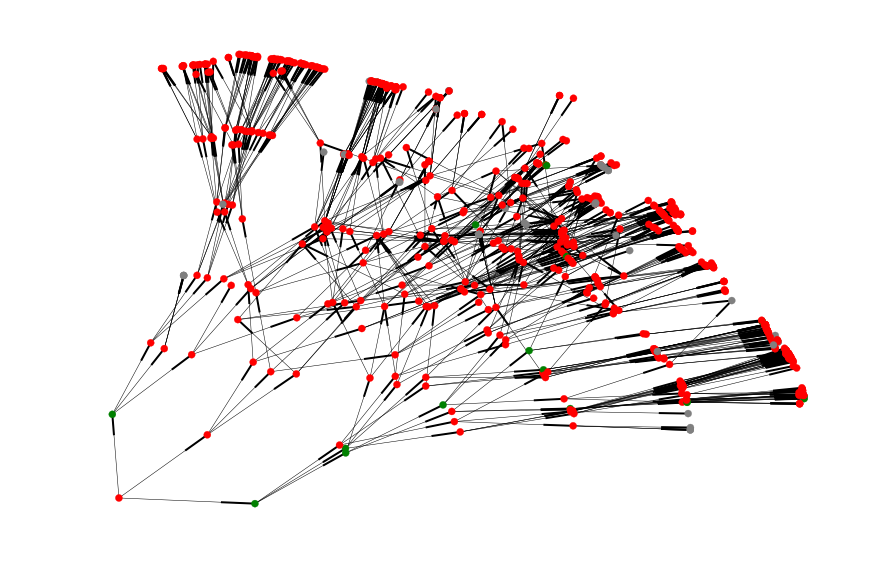

In [14]:
G_google_math = nx.read_gpickle(os.path.join("saved", "graphs", "https:,,www.google.ch,search?q=course+about+mathematics-depth:6-breadth:3.pkl"))
draw_graph(G_google_math, plt)

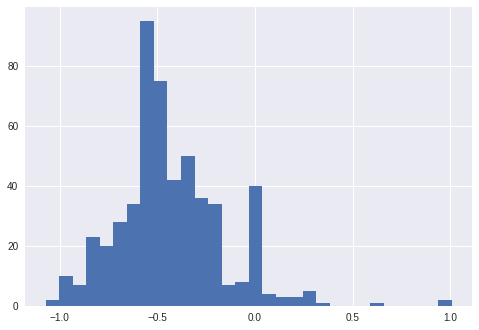

In [15]:
from crawler import get_df

df_psy = get_df(G_google_psy)
undecided = df_psy[(df_psy.status != Node.status['fail']) & (df_psy.decision_func < 0.25) & (df_psy.decision_func > -0.25)]
undecided

df_psy.decision_func.hist(bins=30)

In [16]:
def draw_two_graphs(G1, label1, G2, label2, plt):
    colors_1 = []
    colors_2 = []

    for node in G1:
        if node.status == Node.status[True]:
            colors_1.append('green')
        elif node.status == Node.status[False]:
            colors_1.append('red')
        else:
            # Download error
            colors_1.append('grey')
            
    for node in G2:
        if node.status == Node.status[True]:
            colors_2.append('green')
        elif node.status == Node.status[False]:
            colors_2.append('red')
        else:
            # Download error
            colors_2.append('grey')

    fig, (ax1, ax2)  = plt.subplots(2, figsize=(12, 12))
    ax1.set_facecolor((1, 1, 1))
    ax1.grid(color=(0.9, 0.9, 0.9))
    ax2.set_facecolor((1, 1, 1))
    ax2.grid(color=(0.9, 0.9, 0.9))
    
    nx.draw_kamada_kawai(G1, ax=ax1, node_color=colors_1, with_labels=False, node_size=50, width=0.5, alpha=1)
    nx.draw_kamada_kawai(G2, ax=ax2, node_color=colors_2, with_labels=False, node_size=50, width=0.5, alpha=1)
    
    ax1.set_xlabel(label1, fontsize=20)
    ax2.set_xlabel(label2, fontsize=20)
    
    fig.savefig(os.path.join("figures", "two_graphs"))

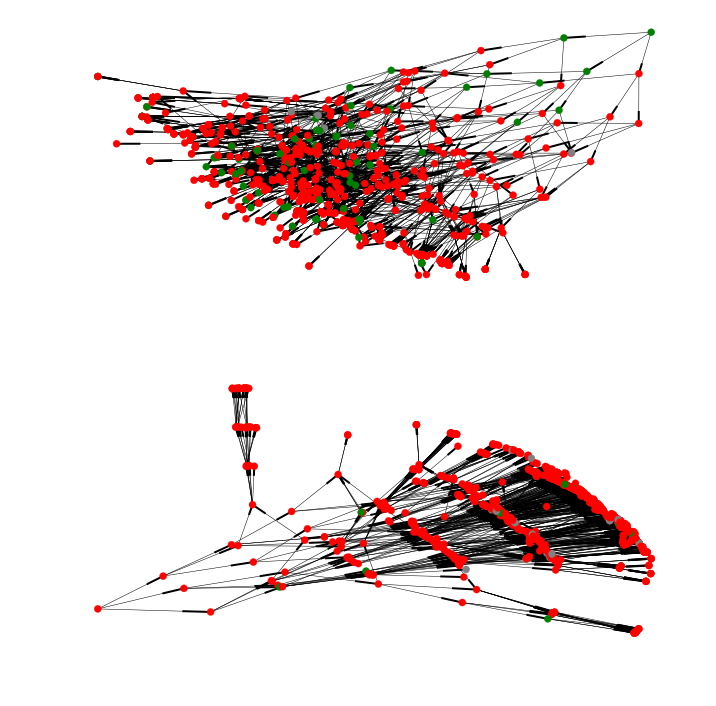

In [17]:
draw_two_graphs(G_tutsplus, "tutsplus.com", G_medium, "medium.com", plt)

In [18]:
import graphistry
from keys import GRAPHISTRY_KEY
graphistry.register(key=GRAPHISTRY_KEY)

In [19]:
# Two problems: Bug with networkx (KeyError 0), and Node is not serializable. Graphistry probably not compatible anymore
#graphistry.bind(source='src', destination='dst', node='nodeid').plot(G)

In [23]:
for node in G_medium.nodes:
    print(node.status, node.decision_func, node.url)

class_false -0.213799387392 https://points.datasociety.net/how-demo-or-die-helped-my-career-89feaa5773e7?source=user_profile---------2----------------#--responses
class_false -0.352057480596 https://medium.com/m/signin?redirect=https%3A%2F%2Fmedium.com%2Fs%2Fthe-slow-up%2Funexpected-lessons-from-unintentionally-starting-a-business-e0bb44b716bc&source=--------------------------nav_reg&operation=register
class_false -0.438426053134 https://l.facebook.com/l.php?u=https%3A%2F%2Fwww.nytimes.com%2F2017%2F12%2F05%2Fworld%2Fcanada%2Fbonjour-hi-quebec.html%3Fsmid%3Dfb-nytimes%26smtyp%3Dcur&h=ATN_WZfD655O2XfDrHVp3okNG1PM6RDwv9PECWYrfPsFeT1zIj3PKaDfohgwE9PaMJDISqyseIfaaVZVzBLkPx6Iqhc4h2eWRE6D9p6W2NoMPx9b1Emh1FcxQEW0pjZi1Co_2syff91MR2AHNPoaoSgn6l9hujJkBIJeeSCbbjwCOoCxXmAsHHZGki5KrqVn55SIEEGrpRfDEXDuLAOZOAZwk7WCBe3c8NW2U5P02rf_YCj9ocDSD82FQ2tIAlkXtgoLgc5FkuFoXGeJWxjKdA
req_failed 0 https://t.co/hashtag/OptOutside?src=hash
class_false -0.171094086045 https://medium.com/@algore?source=user_profile---

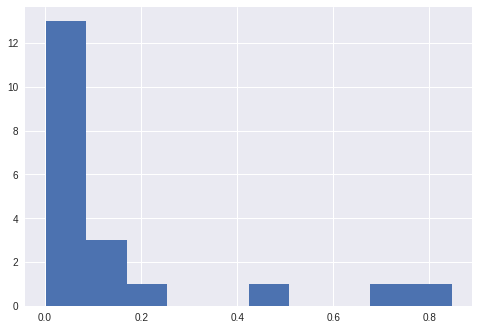

In [27]:
positives_decision = []

for node in G_medium.nodes:
    if node.status == 'class_true':
        positives_decision.append(node.decision_func)
        
        
pd.Series(positives_decision).hist()

In [28]:
for node in G_tutsplus.nodes:
    print(node.status, node.decision_func, node.url)

class_false -0.13152182997 https://computers.tutsplus.com/categories/security
class_false -0.127440669166 https://computers.tutsplus.com/ebooks
class_false -0.177563499482 http://design.tutsplus.com/tutorials/how-to-draw-autumn-leaves-on-old-paper-and-wooden-background-in-adobe-illustrator--cms-29319
class_false -0.308297722481 https://design.tutsplus.com/categories/text-effects
class_false -0.0560044122963 https://photography.tutsplus.com/categories/how-to
class_false -0.254902761103 https://elements.envato.com/graphic-templates/infographics
class_false -0.0503264063243 https://business.tutsplus.com/ebooks
class_true 0.0302742503019 https://code.tutsplus.com/categories/wordpress
class_false -0.259158421379 https://community.envato.com/category/learning/
class_false -0.235055283464 https://elements.envato.com/graphic-templates/ux-and-ui-kits
class_true 0.234143795017 https://design.tutsplus.com/courses/gravit-designer-quick-start
class_false -0.781745497012 https://www.youtube.com/watc